# Mathematics of Machine Learning
## Chapter 3: Linear Predictors
### Section 3.2: Logistic regression

#### Python script for applying logistic regression to the MNIST dataset

#### Preliminaries
(a) Loading required libraries and load the data

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

In [10]:
# Load data 
# WARNING: This can take some time
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

# Extracting "7" and "8"
ind = np.concatenate(np.where( (y == '7') | (y == '8')))
X = X[ind,:]
y = y[ind]

# Transfoming feature to [0,1]
X = X/np.max(X)

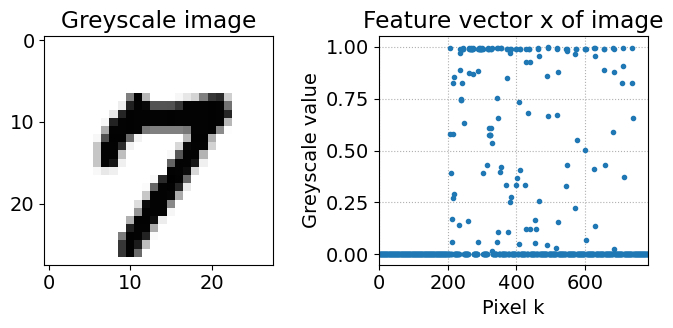

In [11]:
# Plotting one greyscale image and its feature vector
ind = 7000
im = np.array(X[ind,:])
im.resize(28,28)

plt.rcParams.update({'font.size': 14})
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7, 3.5))
ax1.imshow(im, cmap = "Greys")
ax1.set_title("Greyscale image")
ax2.plot(np.arange(784), X[ind,:], ".")
ax2.set_title("Feature vector x of image")
ax2.set_xlabel("Pixel k")
ax2.set_ylabel("Greyscale value")
ax2.grid(linestyle='dotted')
ax2.set_xlim(0, 783)
fig.tight_layout()
plt.show()

### (1) Apply logistic regression

In [12]:
%%time

# Define the logistic model, i.e., no penalty term (default is "l2")
LogReg = LogisticRegression(random_state=0, penalty = None)

# Fitting the model, i.e., minimizing empirical risk
LogReg = LogReg.fit(X, y)

# Output number of required itersions (default setting for maximal is 100)
print(LogReg.n_iter_)

# Output mean accuracy on training data
print(LogReg.score(X, y))

[71]
1.0
CPU times: total: 4.53 s
Wall time: 1.71 s


['7' '8']
[-6.64233375]


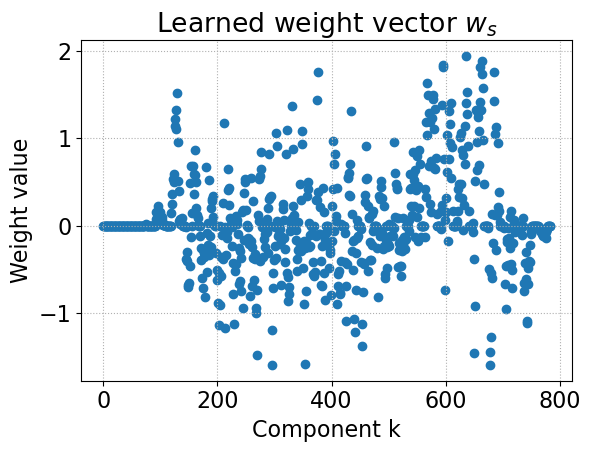

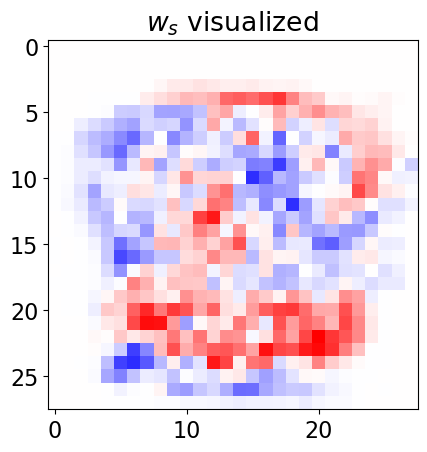

In [21]:
# Output the classes
print(LogReg.classes_)

# Output the bias
print(LogReg.intercept_)

# Display the weight vector: LogReg.coef_
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
ax.scatter(np.arange(784), LogReg.coef_ )
ax.set_title("Learned weight vector $w_s$")
ax.set_xlabel("Component k")
ax.set_ylabel("Weight value")
ax.grid(linestyle='dotted')
ax2.set_xlim(0, 783)
fig.tight_layout()
plt.show()

# Plot learned weight vector w_s and output learned bias b_s
fig, ax = plt.subplots()
coef = LogReg.coef_
scale = np.abs(coef).max()
ax.imshow(
        coef.reshape(28, 28),
        interpolation="nearest",
        cmap = "bwr",
        vmin=-scale,
        vmax=scale,
    )
ax.set_title("$w_s$ visualized")
plt.show()

In [15]:
# Define the logistic model, i.e., no penalty term (default is "l2")
# BUT allow now just for 25 iterations
LogReg = LogisticRegression(random_state=0, max_iter = 25, penalty = None)

# Fitting the model, i.e., minimizing empirical risk
LogReg = LogReg.fit(X, y)

# Output mean accuracy on training data
print(LogReg.score(X, y))

0.9958917693724324


C:\Users\Prof\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


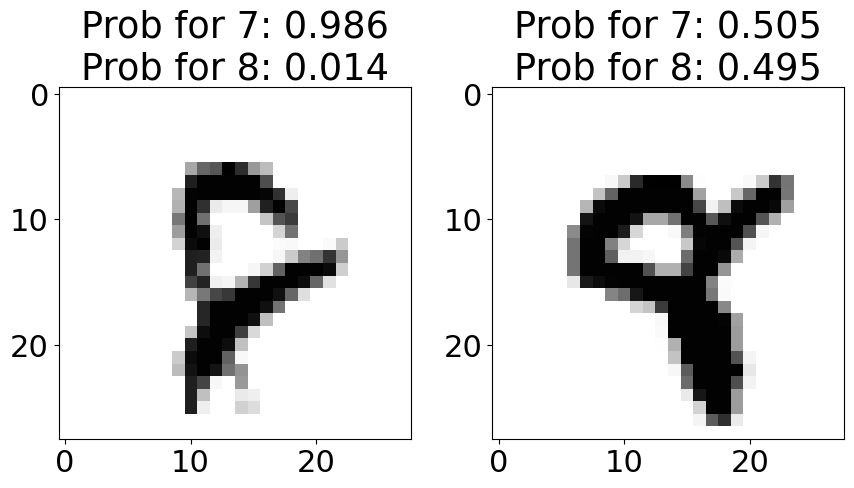

In [29]:
# Predict classes and probabilities
c = LogReg.predict( X )
p = LogReg.predict_proba( X )

# Plot most and least certain classified 7 or 8
ind = np.where( c == '7' ) # 7s
ind = np.where( c == '8' ) # 8s

# ... most and least certain wrongly classified 7 or 8
b = np.array([[c == '7', y == '8']]) # wrongly classified 7s
#b = np.array([[c == '8', y == '7']]) # wrongly classified 8s
ind = np.where( np.all(b[0,:,:], axis=0))


# Least certain for 7 and 8, respectively
ind_min = ind[0][ np.argmin( p[ind,0] ) ] # 7s
#ind_min = ind[0][ np.argmin( p[ind,1] ) ] # 8s

# Most certain for 7 and 8, respectively
ind_max = ind[0][ np.argmax( p[ind,0] ) ] # 7s
#ind_max = ind[0][ np.argmax( p[ind,1] ) ] # 8s

# Plotting 
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 2, figsize = (9,9))
x_item = X[ind_max,:]
axs_0 = axs[0].imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
axs[0].set_title(f'Prob for 7: {np.round(p[ind_max,0], decimals=3)}\nProb for 8: {np.round(p[ind_max,1], decimals=3)}')
x_item = X[ind_min,:]
axs_1 = axs[1].imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
axs[1].set_title(f'Prob for 7: {np.round(p[ind_min,0], decimals=3)}\nProb for 8: {np.round(p[ind_min,1], decimals=3)}')
fig.tight_layout()
plt.show()
